In [452]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt

## Loading Datasets

In [453]:
df1=pd.read_csv('Additional.csv',header=None)

In [454]:
df2=pd.read_csv('Hypertension.csv',header=None)

In [455]:
df3=pd.read_csv('Healthy.csv',header=None)

In [456]:
df1.shape,df2.shape,df3.shape

((195, 1024), (219, 1024), (219, 1024))

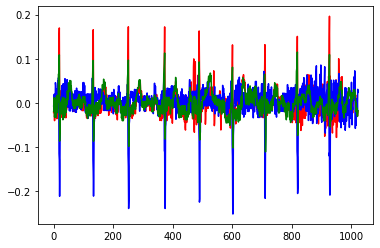

In [483]:
plt.plot(list(range(1024)),df1.iloc[0,:],c='r')
plt.plot(list(range(1024)),df1.iloc[1,:],c='b')
plt.plot(list(range(1024)),df1.iloc[2,:],c='g')
plt.show()

# Formatting the training data

In [484]:
np_h=np.zeros((73+59,3,1024)).astype(np.float16)

In [485]:
ind_y=[(i,1.0) for i in range(73)]+[(i,0.0) for i in range(73,73+59)]

In [486]:
np.random.shuffle(ind_y)
ind_y[:10]

[(49, 1.0),
 (89, 0.0),
 (29, 1.0),
 (50, 1.0),
 (33, 1.0),
 (59, 1.0),
 (35, 1.0),
 (115, 0.0),
 (103, 0.0),
 (54, 1.0)]

In [487]:
labels=np.array([i[1] for i in ind_y])

In [488]:
for i in range(0,73+59):
    #taking ith element from ind_y
    ind=ind_y[i][0]
    if ind<73:
        np_h[i,:,:]=df2.iloc[(3*ind):(3*ind+3),:]
    else:
        np_h[i,:,:]=df3.iloc[(3*(ind-73)):3*(ind-73)+3,:]

In [489]:
np_h.shape

(132, 3, 1024)

# Formatting the test data

In [490]:
np_h_t=np.zeros((14+65,3,1024)).astype(np.float16)

In [491]:
ind_y_t=[(i,1.0) for i in range(65)]+[(i,0.0) for i in range(65,65+14)]

In [492]:
labels_t=np.array([i[1] for i in ind_y_t])

In [493]:
for i in range(0,65+14):
    ind=ind_y_t[i][0]
    if ind<65:
        np_h_t[i,:,:]=df1.iloc[(3*ind):(3*ind+3),:]
    else:
        np_h_t[i,:,:]=df3.iloc[(3*(ind-65)):3*(ind-65)+3,:]

In [494]:
np_h_t.shape

(79, 3, 1024)

# Making CNN

SHift tab

In [495]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as pltls

In [519]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3,5), strides=(1,1),padding='valid',activation='relu', input_shape=(3, 1024,1)))
model.add(layers.MaxPooling2D((1,5)))
model.add(layers.Conv2D(32, (1, 5), activation='relu'))
model.add(layers.MaxPooling2D((1,5)))
model.add(layers.Flatten())
model.add(layers.Dense(100))
model.add(layers.Dense(1,activation='sigmoid'))

In [520]:
model.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 1, 1020, 16)       256       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 1, 204, 16)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 1, 200, 32)        2592      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 1, 40, 32)         0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1280)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 100)               128100    
_________________________________________________________________
dense_30 (Dense)             (None, 1)               

In [521]:
model.compile(loss='binary_crossentropy')

In [522]:
np_h=np_h.reshape((-1,3,1024,1))
np_h_t=np_h_t.reshape((-1,3,1024,1))

In [523]:
np_h.shape

(132, 3, 1024, 1)

# training

In [524]:
model.fit(x=np_h,y=labels,batch_size=5,epochs=8)

Train on 132 samples
Epoch 1/8
132/132 [==============================] - 2s 17ms/sample - loss: 0.5423
Epoch 2/8
132/132 [==============================] - 1s 10ms/sample - loss: 0.2427
Epoch 3/8
132/132 [==============================] - 1s 7ms/sample - loss: 0.0618
Epoch 4/8
132/132 [==============================] - 1s 6ms/sample - loss: 0.0316
Epoch 5/8
132/132 [==============================] - 1s 9ms/sample - loss: 0.0150
Epoch 6/8
132/132 [==============================] - 0s 2ms/sample - loss: 0.0061
Epoch 7/8
132/132 [==============================] - 1s 9ms/sample - loss: 0.0015
Epoch 8/8
132/132 [==============================] - 1s 5ms/sample - loss: 6.6203e-04


# Predicting trainset

In [525]:
z=model.predict(np_h)
z.shape,z[:5]

((132, 1), array([[0.9995816 ],
        [0.        ],
        [0.9995092 ],
        [0.9918897 ],
        [0.99746156]], dtype=float32))

In [526]:
z_new=np.where(z>0.44,1,0)
z_new.shape,z_new[:5]

((132, 1), array([[1],
        [0],
        [1],
        [1],
        [1]]))

In [527]:
corr=0
for i in range(132):
    if z_new[i]==labels[i]:
        corr+=1

In [528]:
print(corr/132)

1.0


# Predicting test set

In [529]:
z=model.predict(np_h_t)
z.shape,z[:5]

((79, 1), array([[0.99990666],
        [0.9959938 ],
        [0.9762269 ],
        [0.9982933 ],
        [0.999764  ]], dtype=float32))

In [530]:
z_new=np.where(z>0.44,1,0)
z_new.shape,z_new[:5]

((79, 1), array([[1],
        [1],
        [1],
        [1],
        [1]]))

In [531]:
corr=0
for i in range(79):
    if z_new[i]==labels_t[i]:
        corr+=1

In [532]:
print(corr/79)

0.9873417721518988
